# Time Series  - 2019 - HW -1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf, pacf,adfuller,acovf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
from statsmodels.stats.stattools import jarque_bera
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
DATA_PATH="./"

In [3]:
series = pd.Series.from_csv(f'{DATA_PATH}input.csv', header=None)
series.head()

1    12.8000
2     9.6000
3    17.0372
4    15.1810
5    18.0415
dtype: float64

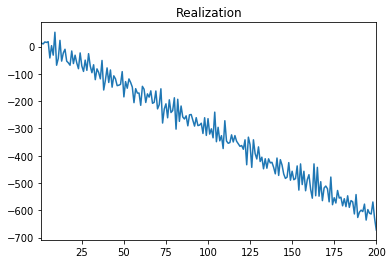

In [4]:
series.plot()
plt.title('Realization')
plt.show()

# 1. TSP DSP Test

## 1.1. Dickey-Fuller

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

* If the test statistic is less than the critical value, we can reject the null hypothesis.
* When the test statistic is greater than the critical value, we fail to reject the null hypothesis.

In [5]:
p_vals=ARMA(series,order=(5,0),exog=np.arange(1,201)).fit().pvalues
for key, value in p_vals.items():
        print('\t%s: %.3f' % (key, value))

	const: 0.000
	x1: 0.000
	ar.L1.y: 0.000
	ar.L2.y: 0.005
	ar.L3.y: 0.421
	ar.L4.y: 0.558
	ar.L5.y: 0.855


In [6]:
result = adfuller(series,regression='ct',maxlag=2,autolag=None)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('usedlags: %d'% result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# not stationary

ADF Statistic: -10.485569
p-value: 0.000000
usedlags: 2
Critical Values:
	1%: -4.005
	5%: -3.433
	10%: -3.140


# 2. Estimate determimistic component

## 2.1. using OLS

In [7]:
n = len(series.index)
x = pd.Series(range(1, n + 1 ,1))
y = series.values
#Least squares estimate
y_mean=np.mean(y)
x_mean=np.mean(x)
# Building the model
sum_diff_x_sq=np.sum((x-x_mean)**2)
sum_dx_dy=np.sum((x-x_mean)*(y-y_mean))
theta1=(sum_dx_dy/sum_diff_x_sq)
theta0=(y_mean)-theta1*(x_mean)
print("theta0_estimate:",theta0)
print("theta1_estimate:", theta1)

theta0_estimate: 19.704481914572852
theta1_estimate: -3.2275090787519694


theta0 = 19.7045, theta0 = -3.227509


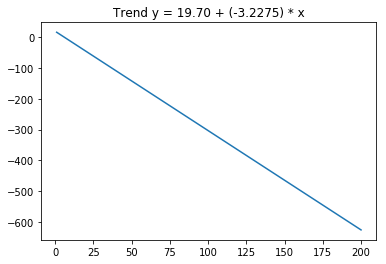

In [8]:
print('theta0 = %.4f, theta0 = %.6f' % (theta0,theta1))
y_ols = [theta0]*n + theta1*x
y_ols.index=range(1,n+1)
plt.plot(x,y_ols)
plt.title('Trend y = %.2f + (%.4f) * x'% (theta0,theta1))
plt.show()

# 3. Detrend time series

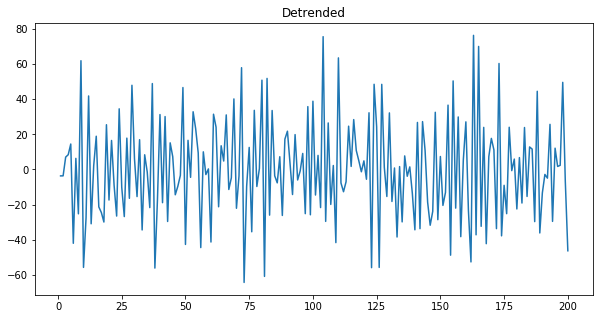

In [9]:
detrended=series-y_ols
plt.figure(figsize=(10,5))
plt.plot(detrended)
plt.title('Detrended')
plt.show()

In [10]:
from scipy import stats
stats.normaltest(detrended)

NormaltestResult(statistic=2.860548368257219, pvalue=0.2392433165298744)

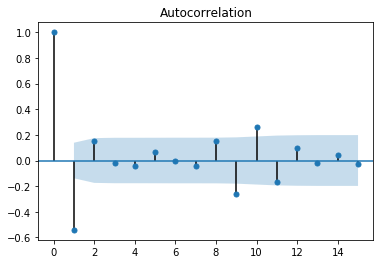

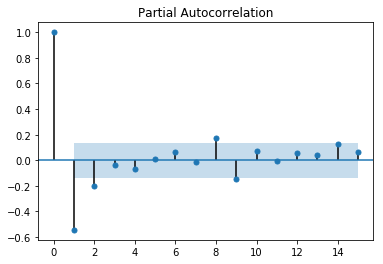

In [11]:
plot_acf(detrended, lags=15)
plot_pacf(detrended, lags=15)
plt.show()

In [12]:
X_acf=acf(detrended)
for abc in X_acf:
    print('{0:.3f}'.format(abc),end=", ")
print()
X_pacf=pacf(detrended)
for abc in X_pacf:
    print('{0:.3f}'.format(abc),end=", ")
X_acvf=acovf(detrended)

1.000, -0.541, 0.154, -0.021, -0.046, 0.064, -0.000, -0.045, 0.151, -0.258, 0.261, -0.166, 0.100, -0.019, 0.045, -0.029, 0.030, -0.058, 0.114, -0.187, 0.132, -0.014, -0.021, -0.005, -0.023, 0.031, 0.040, -0.102, 0.118, -0.062, 0.005, -0.067, 0.016, 0.089, -0.139, 0.134, -0.072, -0.062, 0.129, -0.104, 0.119, 
1.000, -0.544, -0.199, -0.040, -0.071, 0.007, 0.066, -0.012, 0.170, -0.144, 0.074, -0.004, 0.053, 0.038, 0.129, 0.068, 0.048, -0.002, 0.049, -0.118, -0.099, 0.050, 0.001, -0.025, -0.090, 0.004, 0.052, -0.051, -0.026, 0.066, 0.012, -0.162, -0.135, 0.119, -0.082, 0.062, 0.021, -0.069, 0.042, -0.018, 0.135, 

### Dickey-Fuller Test

In [13]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(detrended)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
#ADF is less than 1% crit value
#we can reject the null hypothesis with a significance level of less than 1% 
# the process has no unit root and in turn that the time series is stationary or does not have time-dependent structure.

ADF Statistic: -15.008323
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


In [14]:
# if ADF > crit 5%
if result[0]> result[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

единичных корней нет, ряд стационарен


### Time Series is stationary

1. AR(2)
2. MA(2)
3. ARMA(1,1)

# 5. Estimate parameters

In [16]:
ar2_model = ARMA(detrended, order=(2, 0)).fit(trend='nc')
ar2_model.params

ar.L1.y   -0.659579
ar.L2.y   -0.206294
dtype: float64

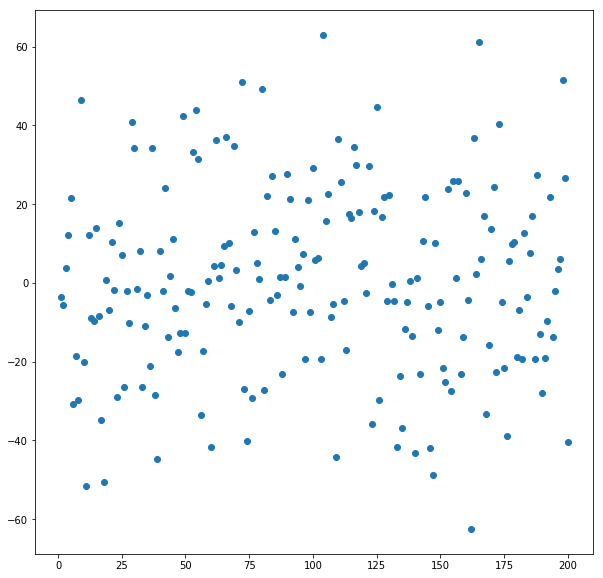

In [17]:
plt.figure(figsize=(10,10))
residuals = pd.DataFrame(ar2_model.resid)
plt.scatter(x,residuals)

In [18]:
for i in range(5):
    y_pred =(ar2_model.params[0]*detrended[n-i-1]+ar2_model.params[1]*detrended[n-i-2])
    print('predicted Y_%i %.3f\treal Y_%i %.3f'%(n-i,y_pred,n-i,detrended[n-i]))

predicted Y_200 -5.951	real Y_200 -46.334
predicted Y_199 -33.203	real Y_199 -6.493
predicted Y_198 -1.893	real Y_198 49.608
predicted Y_197 -3.620	real Y_197 2.337
predicted Y_196 -1.880	real Y_196 1.702


In [15]:
ma2_model = ARMA(detrended, order=(0, 2)).fit(trend='nc')
ma2_model.params

ma.L1.y   -0.665718
ma.L2.y    0.180369
dtype: float64

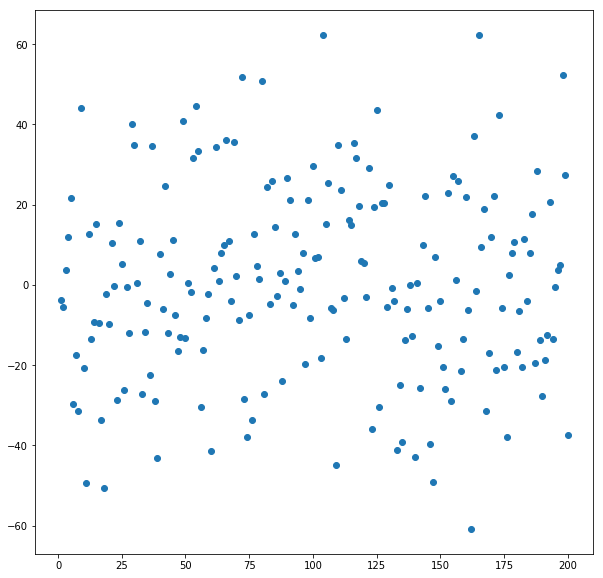

In [24]:
plt.figure(figsize=(10,10))
residuals = pd.DataFrame(ma2_model.resid).values
plt.scatter(x,residuals)

In [25]:
residuals[199]

array([-37.52440946])

In [26]:
for i in range(5):
    y_pred =(ma2_model.params[0]*residuals[n-i-1]+ma2_model.params[1]*residuals[n-i-2])
    print('predicted Y_%i %.3f\treal Y_%i %.3f'%(n-i,y_pred,n-i,detrended[n-i]))

predicted Y_200 29.919	real Y_200 -46.334
predicted Y_199 -8.810	real Y_199 -6.493
predicted Y_198 -33.873	real Y_198 49.608
predicted Y_197 -2.609	real Y_197 2.337
predicted Y_196 -2.589	real Y_196 1.702


In [27]:
arma11_model = ARMA(detrended, order=(1, 1)).fit(trend='nc')
arma11_model.params

ar.L1.y   -0.310926
ma.L1.y   -0.353698
dtype: float64

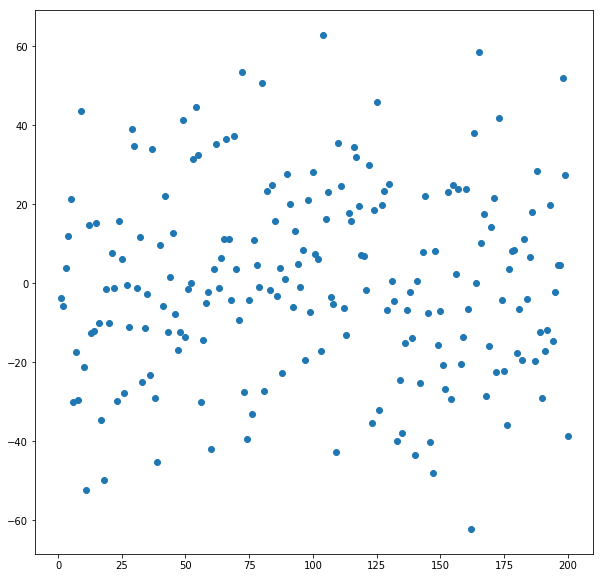

In [28]:
plt.figure(figsize=(10,10))
residuals = pd.DataFrame(arma11_model.resid).values
plt.scatter(x,residuals)

In [29]:
for i in range(5):
    y_pred =(arma11_model.params[0]*detrended[n-i-1]+arma11_model.params[1]*residuals[n-i-1])
    print('predicted Y_%i %.3f\treal Y_%i %.3f'%(n-i,y_pred,n-i,detrended[n-i]))

predicted Y_200 15.706	real Y_200 -46.334
predicted Y_199 -25.081	real Y_199 -6.493
predicted Y_198 -19.095	real Y_198 49.608
predicted Y_197 -2.127	real Y_197 2.337
predicted Y_196 -5.417	real Y_196 1.702


In [37]:
m = np.array([[1,-X_acf[1]],[-X_acf[1],1]])
k = np.array([[X_acf[1]],[X_acf[2]]])
m.shape,k.shape  

((2, 2), (2, 1))

In [38]:
print(X_acf[1])
koef=1-X_acf[1]**2
r_invert=m/koef
r_invert

-0.5412274431688127


array([[1.41428142, 0.76544792],
       [0.76544792, 1.41428142]])

In [39]:
def create_mdl(dta,order):
    arma_mod = sm.tsa.ARMA(endog=dta,order=order).fit(disp=False,trend='nc',method='mle')
    return arma_mod
def get_criterion(mdl):
    return (mdl.aic, mdl.bic)

In [40]:
phis=r_invert.dot(k).reshape(2,)
phis

array([-0.64727341, -0.19593604])

In [41]:
1-k.T.dot(r_invert).dot(k)[0][0]

0.6799276685464648

In [42]:
#sigma2
X_acvf[0]*(1-k.T.dot(r_invert).dot(k)[0][0])

570.5874425453778

In [43]:
#sigma2
X_acvf[0]*(1-X_acf[1]*phis[0]-X_acf[2]*phis[1])

570.5874425453778

In [44]:
#second candidate

In [45]:
alpha1=X_acf[2]/X_acf[1]
print(f'p1 = {X_acf[1]}')
print(f'p2 = {X_acf[2]}')
print(f'alpha = {alpha1}')

p1 = -0.5412274431688127
p2 = 0.15438608883448363
alpha = -0.2852517749849752


In [46]:
beta1=0.3764
print(f'beta = {beta1}')

beta = 0.3764


In [47]:
(X_acvf[1]-X_acvf[0]*alpha1) / beta1

-570.7009107732731

In [48]:
((alpha1+beta1)**2)/(1-alpha1**2) + 1

1.0090438871330623

In [49]:
X_acvf[:2]

array([ 839.18844451, -454.19181616])

In [50]:
orders= [
    (2,0),
    (0,2),
    (1,2),
    (2,1),
    (2,2),
    (1,1),
]

In [51]:
estimats=[]
for order in orders:
    print(f'order={order}')
    mdl=create_mdl(detrended,order=order)
    print(mdl.summary())
    estimats.append(get_criterion(mdl))
    print(f'{mdl.params}\nAIC BIC{estimats[-1]}')
min=9999999
minix=0
for ix,(aic,bic) in enumerate(estimats):
    t = (aic+bic)/2
    if min>t:
        min = t
        minix=ix
print("\nmin",min,orders[minix])

order=(2, 0)
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  200
Model:                     ARMA(2, 0)   Log Likelihood                -917.707
Method:                           mle   S.D. of innovations             23.772
Date:                Wed, 27 Mar 2019   AIC                           1841.415
Time:                        03:44:24   BIC                           1851.310
Sample:                             0   HQIC                          1845.419
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.6596      0.070     -9.457      0.000      -0.796      -0.523
ar.L2.y       -0.2063      0.070     -2.965      0.003      -0.343      -0.070
                                    Roo

In [52]:
# from scipy.stats import jarque_bera
jb=jarque_bera(detrended.values)
print(f'J-b test statistics {jb[0]:.3f}')
print(f'J-b p-value {jb[1]:.3f}')

J-b test statistics 2.820
J-b p-value 0.244


In [31]:
from scipy.stats import jarque_bera

jarque_bera(residuals)

(0.7115247531725665, 0.7006390887081078)

In [32]:
from scipy.stats import shapiro, skew, kurtosis

#check for normality
print('The Skew of the residuals is', skew(residuals))
print('The Kurtosis of the residuals is', kurtosis(residuals, fisher=False))
jb_test = jarque_bera(residuals)
print("The Jarque-Bera test statistic for AR(2) residuals:", jb_test[0])
print("The p-value of the test statistic:", jb_test[1])

#Based on the test - residuals are distributed normally
#P-value > than critial value, we cannot reject H_0

The Skew of the residuals is [0.06631041]
The Kurtosis of the residuals is [2.73962587]
The Jarque-Bera test statistic for AR(2) residuals: 0.7115247531725665
The p-value of the test statistic: 0.7006390887081078


In [95]:
#ar2
-.647 * detrended[199] - .196*detrended[198] 

-5.522494490773771

In [96]:
#arma11
27.0725140  * (-0.3537) + detrended[199]*(-0.3109)

-7.557006558772745

In [92]:
#ma2
51.2731358 * (-0.66) +  5.7314351 *(-0.18)

-34.871927946

In [86]:
print(detrended[198],detrended[199],detrended[200])

49.60811567831706 -6.492575242931025 -46.333966164178946


## 2.2. using LinearRegression

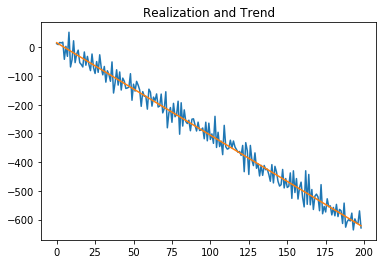

In [70]:
# fit linear model
X = [i for i in range(0, len(series))]
X = np.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
plt.plot(y)
plt.plot(trend)
plt.title('Realization and Trend')
plt.show()